# 02 — Exploração da Transformação (Silver)

Este notebook verifica os artefatos gerados por **Transform** em `silver/`. Inclui gráficos simples para a apresentação.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os

NOTEBOOK_DIR = Path(os.path.abspath('')).resolve()
if NOTEBOOK_DIR.name == 'notebooks':
    PROJECT_ROOT = NOTEBOOK_DIR.parent
else:
    PROJECT_ROOT = NOTEBOOK_DIR

BASE_DIR = PROJECT_ROOT / 'dados'
SILVER = BASE_DIR / 'silver'
GOLD = BASE_DIR / 'gold'
movies_clean_path = SILVER / 'movies_clean.parquet'
ratings_clean_path = SILVER / 'ratings_clean.parquet'
movie_scores_path = GOLD / 'movie_scores.parquet'
user_profiles_path = GOLD / 'user_profiles.parquet'
print('Silver movies:', movies_clean_path)
print('Silver ratings:', ratings_clean_path)
assert movies_clean_path.exists(), f'Arquivo não encontrado: {movies_clean_path}'
assert ratings_clean_path.exists(), f'Arquivo não encontrado: {ratings_clean_path}'

Silver movies: /Users/Jonathas/Desktop/college-code/big-data/av1/bigdata/dados/silver/movies_clean.parquet
Silver ratings: /Users/Jonathas/Desktop/college-code/big-data/av1/bigdata/dados/silver/ratings_clean.parquet


In [2]:
movies_clean = pd.read_parquet(movies_clean_path)
ratings_clean = pd.read_parquet(ratings_clean_path)
print(f'movies_clean: {movies_clean.shape[0]:,} linhas x {movies_clean.shape[1]} colunas')
print(f'ratings_clean: {ratings_clean.shape[0]:,} linhas x {ratings_clean.shape[1]} colunas')
movies_clean.head()

movies_clean: 45,436 linhas x 27 colunas
ratings_clean: 26,024,289 linhas x 5 colunas


,id,imdb_id,title,original_title,original_language,overview,tagline,status,homepage,release_date,...,video,genres_list,production_companies,production_countries,spoken_languages,collection_id,collection_name,collection_poster_path,collection_backdrop_path,poster_path
0,862,tt0114709,Toy Story,Toy Story,en,"Led by Woody, Andy's toys live happily in his ...",None,Released,http://toystory.disney.com/toy-story,1995-10-30,...,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 3, 'name': 'Pixar Animation Studios'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,tt0113497,Jumanji,Jumanji,en,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Released,None,1995-12-15,...,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 559, 'name': 'TriStar Pictures'}, {'id...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,None,None,None,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,en,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Released,None,1995-12-22,...,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 6194, 'name': 'Warner Bros.'}, {'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,en,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Released,None,1995-12-22,...,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 306, 'name': 'Twentieth Century Fox Fi...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",NaN,None,None,None,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,en,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Released,None,1995-02-10,...,False,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 5842, 'name': 'Sandollar Productions'}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [3]:
display(movies_clean.dtypes)
display(ratings_clean.dtypes)
print('\nNulos (%) — movies_clean:')
display((movies_clean.isna().mean() * 100).round(2).sort_values(ascending=False).head(20))
print('\nNulos (%) — ratings_clean:')
display((ratings_clean.isna().mean() * 100).round(2).sort_values(ascending=False).head(20))

id                                  object
imdb_id                             object
title                               object
original_title                      object
original_language           string[python]
overview                            object
tagline                             object
status                              object
homepage                            object
release_date                datetime64[ns]
runtime                            float64
budget                             float64
revenue                            float64
popularity                         float64
vote_average                       float64
vote_count                         float64
adult                               object
video                               object
genres_list                         object
production_companies                object
production_countries                object
spoken_languages                    object
collection_id                      float64
collection_

userId                Int64
movieId               Int64
rating              float64
timestamp             int64
ts           datetime64[ns]
dtype: object


Nulos (%) — movies_clean:


collection_backdrop_path    92.82
collection_poster_path      91.32
collection_name             90.12
collection_id               90.12
homepage                    82.88
tagline                     55.10
overview                     2.10
poster_path                  0.85
runtime                      0.58
release_date                 0.20
status                       0.19
imdb_id                      0.04
original_language            0.02
adult                        0.01
video                        0.01
popularity                   0.01
vote_count                   0.01
vote_average                 0.01
revenue                      0.01
budget                       0.01
dtype: float64


Nulos (%) — ratings_clean:


userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
ts           0.0
dtype: float64

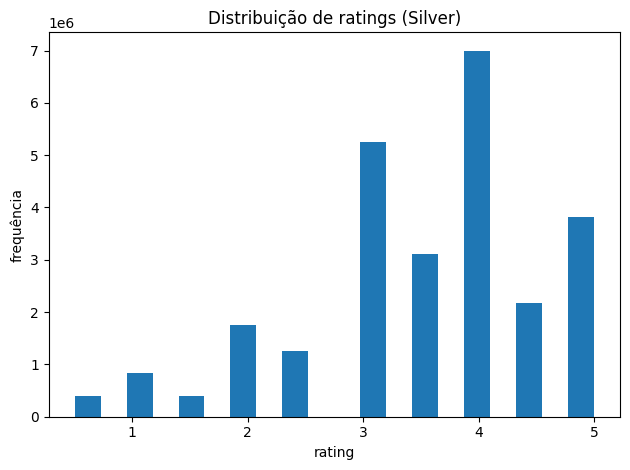

In [4]:
ratings_clean['rating'].plot(kind='hist', bins=20)
plt.title('Distribuição de ratings (Silver)')
plt.xlabel('rating')
plt.ylabel('frequência')
plt.tight_layout()
plt.show()

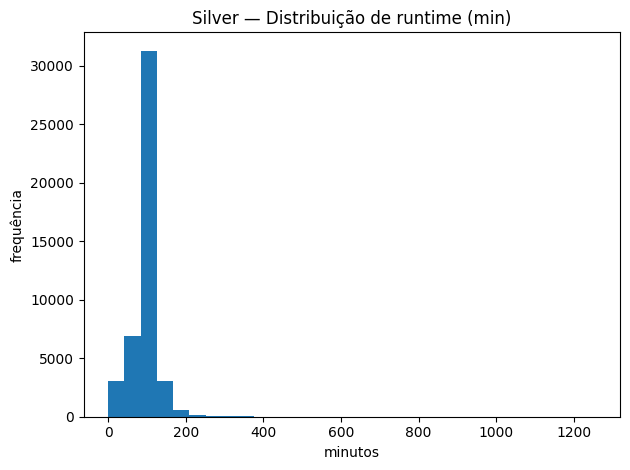

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

rt = pd.to_numeric(movies_clean.get('runtime', pd.Series(dtype=float)), errors='coerce').dropna()
if rt.empty:
    print("movies_clean['runtime'] está vazio ou ausente.")
else:
    rt.plot(kind='hist', bins=30)
    plt.title('Silver — Distribuição de runtime (min)')
    plt.xlabel('minutos')
    plt.ylabel('frequência')
    plt.tight_layout()
    plt.show()


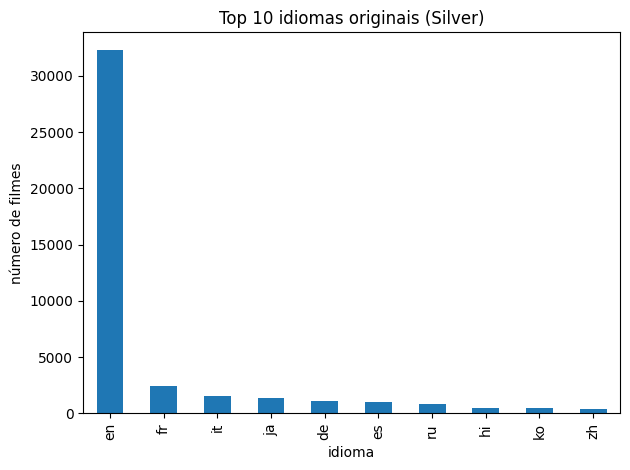

In [6]:
import matplotlib.pyplot as plt

lang_counts = (
    movies_clean['original_language']
    .dropna()
    .astype(str)
    .str.lower()
    .value_counts()
    .head(10)
)

lang_counts.plot(kind='bar')
plt.title('Top 10 idiomas originais (Silver)')
plt.xlabel('idioma')
plt.ylabel('número de filmes')
plt.tight_layout()
plt.show()
